### **load libraries**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **load Data**

In [2]:
train = pd.read_csv(r'/content/fraudTrain.csv')
test = pd.read_csv(r'/content/fraudTest.csv')

In [3]:
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875717,875717,2019-12-21 14:40:06,577588686219,fraud_Greenholt Ltd,health_fitness,48.68,James,Strickland,M,25454 Leonard Lake,...,40.6153,-79.4545,972,Public relations account executive,1997-10-23,6cc00fdbb263644f2f497d462bc31bed,1356100806,41.471742,-78.712721,0.0
875718,875718,2019-12-21 14:40:07,213191402330021,"fraud_Turner, Ruecker and Parisian",misc_pos,25.94,Thomas,Sullivan,M,464 Newman Crossroad,...,42.9676,-88.0434,817312,"Accountant, chartered public finance",2004-03-18,434dc82f2996285df3c2aa0cf28470cb,1356100807,43.248331,-87.317157,0.0
875719,875719,2019-12-21 14:40:15,4497451418073897078,"fraud_Dare, Fritsch and Zboncak",health_fitness,30.95,Elizabeth,Glover,F,246 Stewart Green Suite 149,...,32.5317,-92.1760,54185,"Radiographer, diagnostic",1992-11-20,7552372873c273826e31930051841bf4,1356100815,31.537901,-93.061407,0.0
875720,875720,2019-12-21 14:40:15,4861310130652566408,"fraud_Dare, Fritsch and Zboncak",health_fitness,118.80,Ashley,Cruz,F,65417 Walsh Radial Suite 691,...,30.2385,-90.8435,10076,"Surveyor, rural practice",1977-12-16,4e0683a6558541b16db1916ab61cccb8,1356100815,29.587181,-90.732161,0.0


In [4]:
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


### **Data exploration and cleaning**

In [5]:
print(train.shape)
print(test.shape)

(875722, 23)
(555719, 23)


In [6]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [7]:
train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
875717,875717,2019-12-21 14:40:06,577588686219,fraud_Greenholt Ltd,health_fitness,48.68,James,Strickland,M,25454 Leonard Lake,...,40.6153,-79.4545,972,Public relations account executive,1997-10-23,6cc00fdbb263644f2f497d462bc31bed,1356100806,41.471742,-78.712721,0.0
875718,875718,2019-12-21 14:40:07,213191402330021,"fraud_Turner, Ruecker and Parisian",misc_pos,25.94,Thomas,Sullivan,M,464 Newman Crossroad,...,42.9676,-88.0434,817312,"Accountant, chartered public finance",2004-03-18,434dc82f2996285df3c2aa0cf28470cb,1356100807,43.248331,-87.317157,0.0
875719,875719,2019-12-21 14:40:15,4497451418073897078,"fraud_Dare, Fritsch and Zboncak",health_fitness,30.95,Elizabeth,Glover,F,246 Stewart Green Suite 149,...,32.5317,-92.1760,54185,"Radiographer, diagnostic",1992-11-20,7552372873c273826e31930051841bf4,1356100815,31.537901,-93.061407,0.0
875720,875720,2019-12-21 14:40:15,4861310130652566408,"fraud_Dare, Fritsch and Zboncak",health_fitness,118.80,Ashley,Cruz,F,65417 Walsh Radial Suite 691,...,30.2385,-90.8435,10076,"Surveyor, rural practice",1977-12-16,4e0683a6558541b16db1916ab61cccb8,1356100815,29.587181,-90.732161,0.0
875721,875721,2019-12-21 14:40:16,3598014571045296,fraud_Kuhn LLC,shopping_pos,35.78,Lisa,Clark,F,07943 Davis River,...,35.5580,-77.2566,5903,Manufacturing systems engineer,1993-10-07,6fa831064db76b2792f74025df237493,1356100816,35.300000,NaN,NaN


In [8]:
train.sample(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
383659,383659,2019-06-24 20:55:35,30266994494236,fraud_Ullrich Ltd,kids_pets,30.70,Sarah,Foster,F,77872 Andrea Glen Apt. 543,...,37.1349,-77.7364,1051,Chief Operating Officer,1976-11-21,343a316966aa8a675b1f77cf5aaae42a,1340571335,36.708662,-77.192659,0.0
167495,167495,2019-03-30 00:27:54,4469777115158234880,fraud_Ledner-Pfannerstill,gas_transport,33.94,Gregory,Graham,M,4005 Dana Glens,...,42.7280,-71.1810,47249,Market researcher,1980-11-22,f557dcfd2c8597e6c50145638aeed4a6,1333067274,43.251031,-70.678482,0.0
322285,322285,2019-06-03 07:52:13,30143713661454,fraud_Pacocha-Bauch,shopping_pos,6.40,Nicholas,Thornton,M,5270 Megan Burg Suite 756,...,48.6669,-96.5969,140,"Embryologist, clinical",1942-01-06,9207359374022d7f61ee0a61d68785aa,1338709933,48.032756,-96.702637,0.0


In [9]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,875722.000000,8.757220e+05,875722.000000,875722.000000,875722.000000,875722.000000,8.757220e+05,8.757220e+05,875722.000000,875721.000000,875721.000000
mean,437860.500000,4.167296e+17,70.288413,48795.477793,38.534339,-90.224501,8.901095e+04,1.342105e+09,38.534121,-90.224606,0.005670
std,252799.310556,1.308340e+18,162.749508,26900.808616,5.075532,13.766168,3.023269e+05,8.715097e+06,5.109892,13.778171,0.075083
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.027785,-166.671242,0.000000
25%,218930.250000,1.800400e+14,9.640000,26237.000000,34.668900,-96.798000,7.430000e+02,1.335010e+09,34.738022,-96.899015,0.000000
50%,437860.500000,3.520550e+15,47.450000,48174.000000,39.354300,-87.476900,2.456000e+03,1.342282e+09,39.364313,-87.435089,0.000000
75%,656790.750000,4.642255e+15,83.070000,72011.000000,41.894800,-80.158000,2.047800e+04,1.349552e+09,41.952545,-80.228024,0.000000
max,875721.000000,4.992346e+18,28948.900000,99783.000000,66.693300,-67.950300,2.906700e+06,1.356101e+09,67.510267,-66.956540,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875722 entries, 0 to 875721
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             875722 non-null  int64  
 1   trans_date_trans_time  875722 non-null  object 
 2   cc_num                 875722 non-null  int64  
 3   merchant               875722 non-null  object 
 4   category               875722 non-null  object 
 5   amt                    875722 non-null  float64
 6   first                  875722 non-null  object 
 7   last                   875722 non-null  object 
 8   gender                 875722 non-null  object 
 9   street                 875722 non-null  object 
 10  city                   875722 non-null  object 
 11  state                  875722 non-null  object 
 12  zip                    875722 non-null  int64  
 13  lat                    875722 non-null  float64
 14  long                   875722 non-nu

In [11]:
train.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875718,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875719,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875720,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
train.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [13]:
d = train.isnull().sum()
d[d > 0]

,0
merch_long,1
is_fraud,1


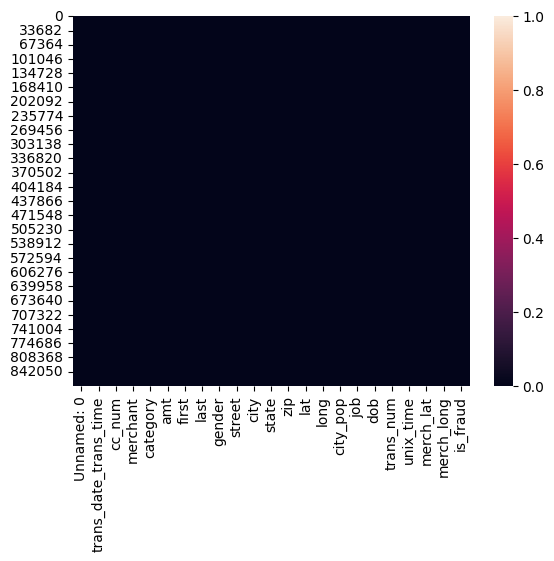

In [14]:
sns.heatmap(train.isnull())
plt.show()

In [15]:
train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
875717,False
875718,False
875719,False
875720,False


In [16]:
train.duplicated().sum()

np.int64(0)

In [17]:
train.dropna(inplace = True)

In [18]:
train.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [19]:
d = train.isnull().sum()
d[d > 0]

,0


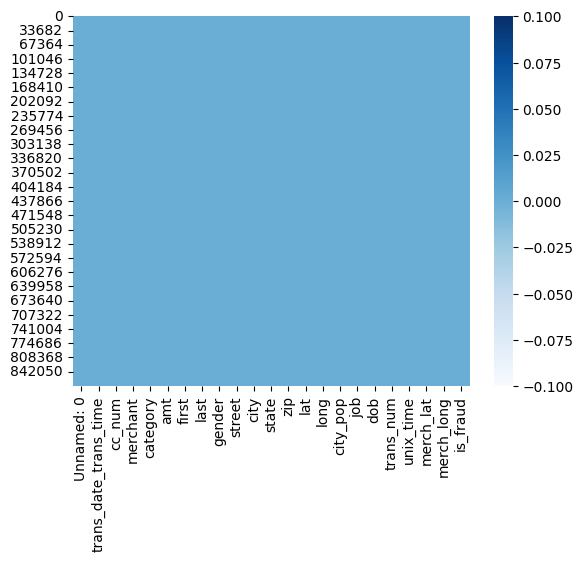

In [20]:
sns.heatmap(train.isnull(),cmap='Blues')
plt.show()

In [21]:
test.dropna(inplace=True)

In [22]:
d = test.isnull().sum()
d[d > 0]

,0


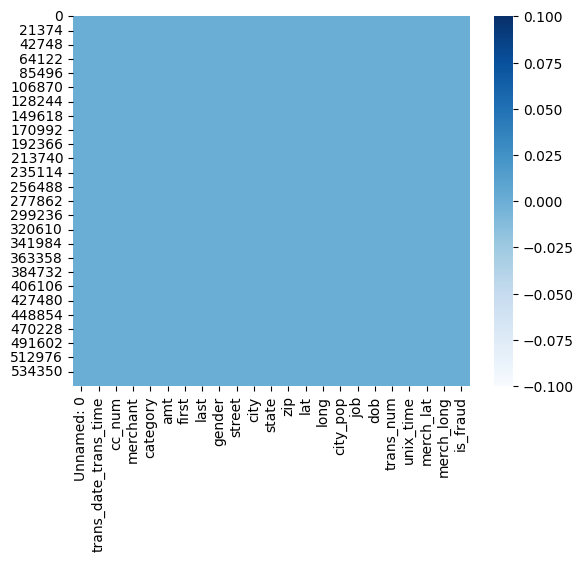

In [23]:
sns.heatmap(test.isnull(),cmap='Blues')
plt.show()

### **Data analysis**

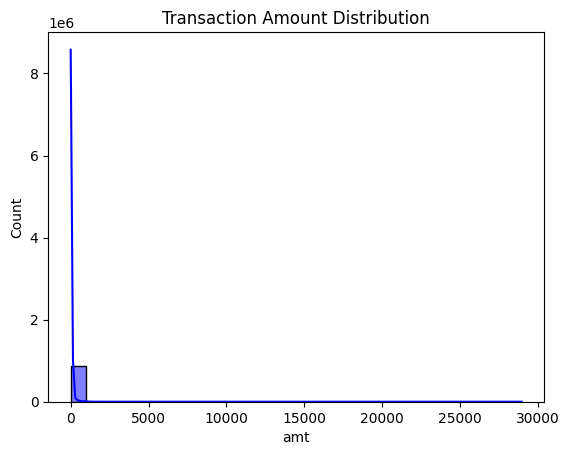

In [24]:
sns.histplot(train['amt'], bins=30, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.show()

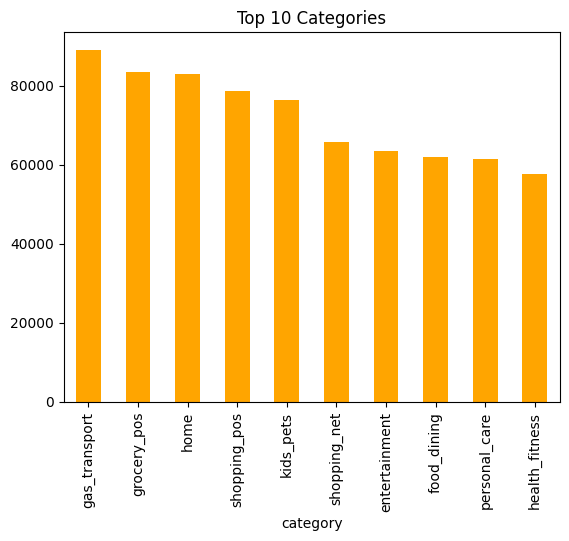

In [25]:
train['category'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Categories")
plt.show()

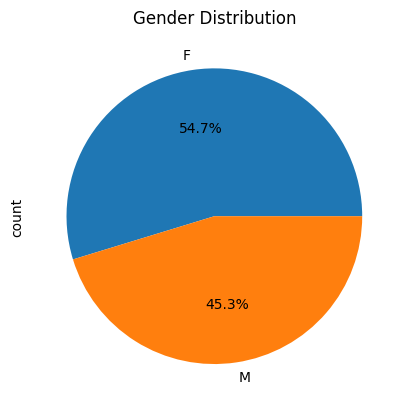

In [26]:
train['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

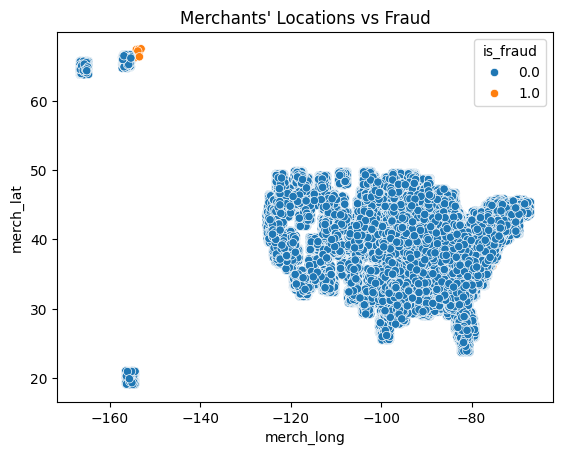

In [27]:
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=train)
plt.title("Merchants' Locations vs Fraud")
plt.show()

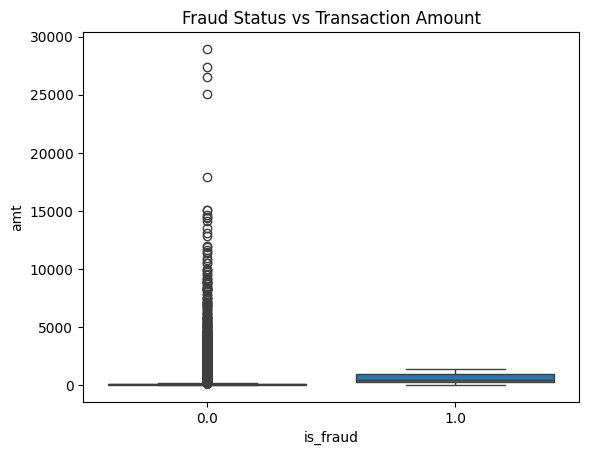

In [28]:
sns.boxplot(x='is_fraud', y='amt', data=train)
plt.title("Fraud Status vs Transaction Amount")
plt.show()

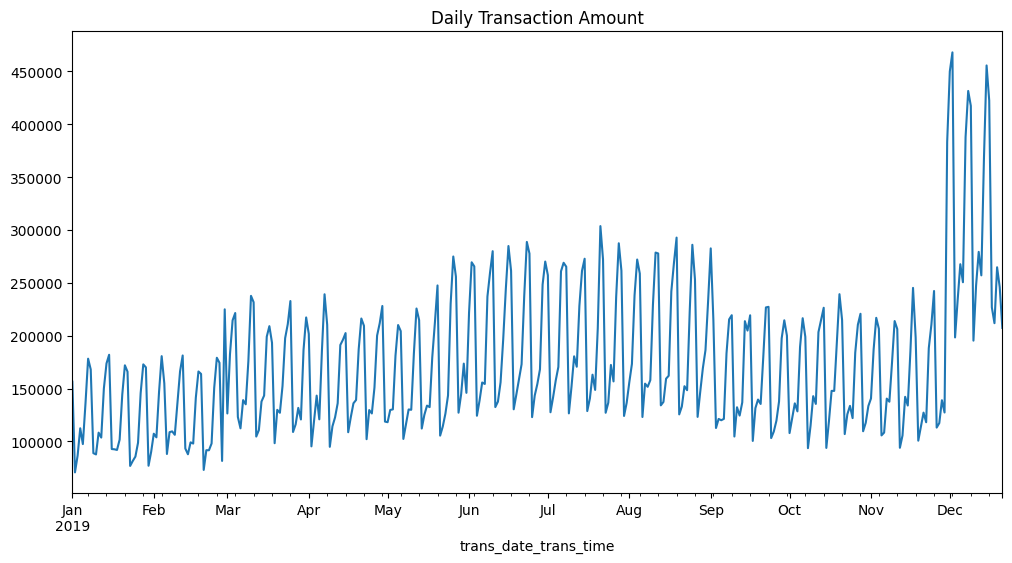

In [29]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
daily_data = train.set_index('trans_date_trans_time')['amt'].resample('D').sum()
daily_data.plot(figsize=(12, 6))
plt.title("Daily Transaction Amount")
plt.show()

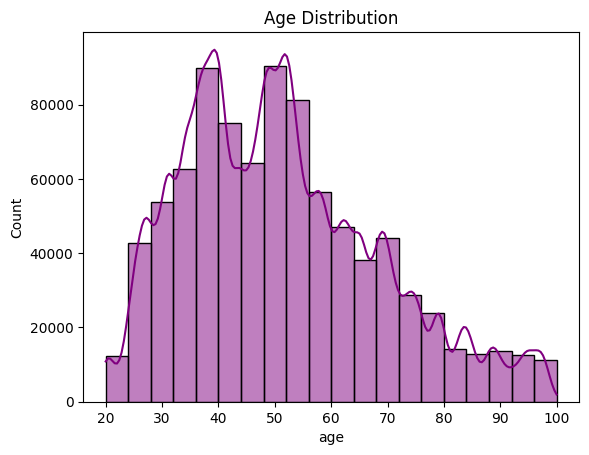

In [30]:
train['dob'] = pd.to_datetime(train['dob'])
train['age'] = (pd.Timestamp.now() - train['dob']).dt.days // 365
sns.histplot(train['age'], bins=20, kde=True, color='purple')
plt.title("Age Distribution")
plt.show()

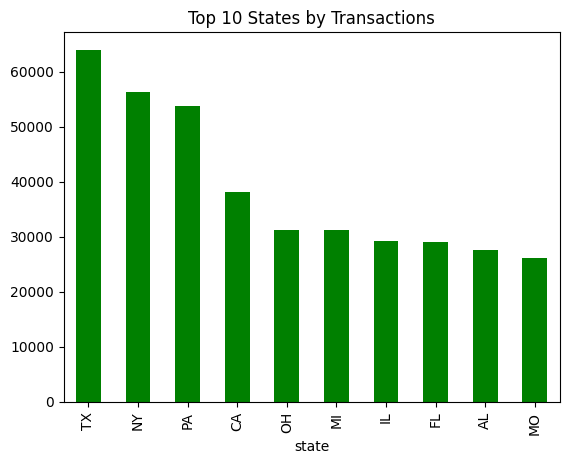

In [31]:
train['state'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 States by Transactions")
plt.show()

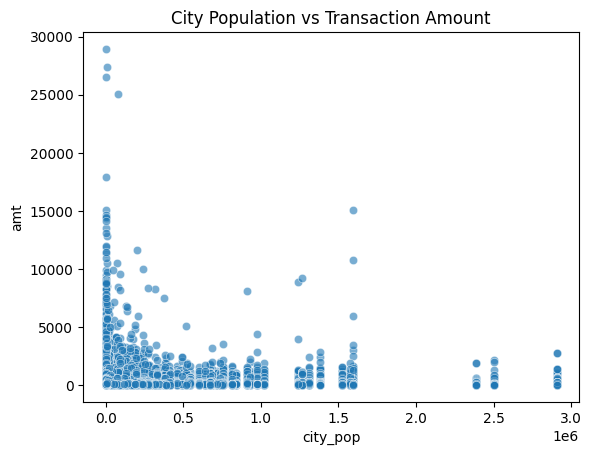

In [32]:
sns.scatterplot(x='city_pop', y='amt', data=train, alpha=0.6)
plt.title("City Population vs Transaction Amount")
plt.show()

### Data **cleaning**

In [33]:
train.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num',
           'trans_date_trans_time'], axis = 1, inplace = True)

In [34]:
train.shape

(875721, 13)

In [35]:
test.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num',
           'trans_date_trans_time'], axis = 1,inplace = True)

In [36]:
test.shape

(555719, 12)

### **Data transformation**

In [61]:
le = LabelEncoder()
train['merchant'] = le.fit_transform(train['merchant'])
train['job'] = le.fit_transform(train['job'])
train['category'] = le.fit_transform(train['category'])
train['gender'] = le.fit_transform(train['gender'])

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492592 entries, 198738 to 181250
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    492592 non-null  int64  
 1   category    492592 non-null  int64  
 2   amt         492592 non-null  float64
 3   gender      492592 non-null  int64  
 4   lat         492592 non-null  float64
 5   long        492592 non-null  float64
 6   city_pop    492592 non-null  int64  
 7   job         492592 non-null  int64  
 8   unix_time   492592 non-null  int64  
 9   merch_lat   492592 non-null  float64
 10  merch_long  492592 non-null  float64
 11  age         492592 non-null  int64  
 12  is_fraud    492592 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 52.6 MB


In [63]:
le = LabelEncoder()
test['merchant'] = le.fit_transform(test['merchant'])
test['job'] = le.fit_transform(test['job'])
test['category'] = le.fit_transform(test['category'])
test['gender'] = le.fit_transform(test['gender'])

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  int64  
 1   category    555719 non-null  int64  
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  int64  
 4   lat         555719 non-null  float64
 5   long        555719 non-null  float64
 6   city_pop    555719 non-null  int64  
 7   job         555719 non-null  int64  
 8   unix_time   555719 non-null  int64  
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 50.9 MB


### **Create model**

In [91]:
X = train.drop('is_fraud', axis=1)
y = train['is_fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22, shuffle=True)


train = pd.concat([X_train, y_train], axis=1)


class_0 = train[train['is_fraud'] == 0]
class_1 = train[train['is_fraud'] == 1]


min_size = min(len(class_0), len(class_1))


class_0_resampled = resample(class_0, replace=False, n_samples=min_size, random_state=42)
class_1_resampled = resample(class_1, replace=False, n_samples=min_size, random_state=42)


balanced_train = pd.concat([class_0_resampled, class_1_resampled])


X_train_balanced = balanced_train.drop('is_fraud', axis=1)
y_train_balanced = balanced_train['is_fraud']

print("Balanced Training Data Distribution:")
print(y_train_balanced.value_counts())

print("X_train_balanced shape:", X_train_balanced.shape)
print("X_test shape:", X_test.shape)

Balanced Training Data Distribution:
is_fraud
0.0    1420
1.0    1420
Name: count, dtype: int64
X_train_balanced shape: (2840, 12)
X_test shape: (110834, 12)


In [92]:
mode11 = LogisticRegression()
mode11.fit(X_train_balanced, y_train_balanced)
y_pred = mode11.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.9571611599328725
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    110187
         1.0       0.10      0.74      0.17       647

    accuracy                           0.96    110834
   macro avg       0.55      0.85      0.57    110834
weighted avg       0.99      0.96      0.97    110834



In [93]:
mode12 = DecisionTreeClassifier()
mode12.fit(X_train_balanced, y_train_balanced)
y_pred = mode12.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.9258350325712327
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    110187
         1.0       0.07      0.92      0.13       647

    accuracy                           0.93    110834
   macro avg       0.53      0.92      0.54    110834
weighted avg       0.99      0.93      0.96    110834



In [112]:
model3 = RandomForestClassifier(n_estimators = 20)
model3.fit(X_train_balanced, y_train_balanced)
y_pred = model3.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.9629987188046989
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    110187
         1.0       0.12      0.88      0.22       647

    accuracy                           0.96    110834
   macro avg       0.56      0.92      0.60    110834
weighted avg       0.99      0.96      0.98    110834



In [113]:
print(model3.score(X_test, y_test))
print(model3.score(X_train_balanced, y_train_balanced))
print(confusion_matrix(y_test, y_pred))

0.9629987188046989
0.9996478873239436
[[106163   4024]
 [    77    570]]
